# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve,recall_score
from sklearn.utils._bunch import Bunch
# Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [2]:
# initialize a dataframe from the csv data
df = pd.read_csv('Data/ExtraaLearn.csv')

In [3]:
# initial inspection of the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# look at the columns and datatypes for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
# function to inspect the data types, variables and number of entries in each column

def inspect_variable_values(data: pd.DataFrame):
    
    # iterate through each column
    for i, col in enumerate(data.columns):
        
        # get a pandas series of the values in each column
        vals: np.ndarray = data[col].unique()
        
        # get the data type of the variables
        data_type = vals.dtype
        
        # print the column name
        print(f'{i + 1}. {col} \n')
        
        # print the columns data type
        print(f'Data type: {data_type}')
        
        # print the number of values the variable takes on
        print("Number of values:", len(vals))
        
        # print the values inside the column
        
        # if the variable takes on < 20 vals, print all the values
        if len(vals) < 20: 
            print("Values taken on by the variable:",vals)
        else:
            # otherwise, if the variable takes on > 20 values and is numeric, then print the range of values the variable takes on
            if isinstance(data_type, (np.dtypes.Int64DType, np.dtypes.Float64DType)):
                print("Values taken on by the variable:",f"Range: {vals.min()} - {vals.max()}")
            else:
                # otherwise the values are categorical, then print only the first 20 values
                print("Values taken on by the variable:", vals[:20])
        
        # new line between columns        
        print()

In [6]:
# call to the inspection function 
inspect_variable_values(df)

1. ID 

Data type: object
Number of values: 4612
Values taken on by the variable: ['EXT001' 'EXT002' 'EXT003' 'EXT004' 'EXT005' 'EXT006' 'EXT007' 'EXT008'
 'EXT009' 'EXT010' 'EXT011' 'EXT012' 'EXT013' 'EXT014' 'EXT015' 'EXT016'
 'EXT017' 'EXT018' 'EXT019' 'EXT020']

2. age 

Data type: int64
Number of values: 46
Values taken on by the variable: Range: 18 - 63

3. current_occupation 

Data type: object
Number of values: 3
Values taken on by the variable: ['Unemployed' 'Professional' 'Student']

4. first_interaction 

Data type: object
Number of values: 2
Values taken on by the variable: ['Website' 'Mobile App']

5. profile_completed 

Data type: object
Number of values: 3
Values taken on by the variable: ['High' 'Medium' 'Low']

6. website_visits 

Data type: int64
Number of values: 27
Values taken on by the variable: Range: 0 - 30

7. time_spent_on_website 

Data type: int64
Number of values: 1623
Values taken on by the variable: Range: 0 - 2537

8. page_views_per_visit 

Data type: fl

### Observations:

The data consists of 15 columns (variables). None of the columns contain null values. 

The set of features consist of the following numerical, categorical and binary variables:

Numerical Variables:

1. Age, an integer ranging from 18 to 63.
2. Number of Website visits, an integer ranging form 0 to 30.
3. Time spent on the website, an integer (indicating seconds) ranging from 0 to 2537.
4. Page views per visit, a floating point number.

Categorical Variables:

1. Current Occupation, Values: Unemployed, Professional, Student
2. First Interaction, Values: Website, Mobile App
3. Percentage Profile Completed, Values: High, Medium, Low
4. Last Activity, Values: Website Activity, Email Activity, Phone Activity

Binary Variables:

1. Print Media Type 1
2. Print Media Type 2
3. Digital Media
4. Educational Channels
5. Referral

The Target or Response variable is the binary 'status' variable. Which indicates whether the lead was converted to a paying customer or not.

The ID variable is unique to each lead and is therefore irrelevant to the analysis. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [7]:
# first drop the irrelevant column (id)
df = df.drop(columns = 'ID')

In [8]:
# check that the column has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [9]:
# list of column names for numerical variables
numerical_vars: list = []

# list of column names for categorical variables
categorical_vars: list = []

# list of column names for binary variables
binary_vars: list = []

In [10]:
# loop through the data and add the column name to the appropriate list

for col in df: 
    vals = df[col].to_numpy()
    data_type = vals.dtype
    
    if isinstance(data_type, (np.dtypes.Int64DType, np.dtypes.Float64DType)) and len(vals) > 2:
        numerical_vars.append(col)
    elif np.isin("Yes", vals):
        binary_vars.append(col)
    else:
        categorical_vars.append(col)

In [11]:
numerical_vars.remove("status")
print("Numerical Variables: ",numerical_vars)
print("Categorical Variables: ",categorical_vars)
print("Binary Variables: ",binary_vars)

Numerical Variables:  ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
Categorical Variables:  ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
Binary Variables:  ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


## Analyze categorical variables

In [12]:
# analyze the categorical variables using countplots
def analyze_categorical(cat_df: pd.DataFrame):
    
    plots = list()
    
    # loop through each column and create a countplot
    for col in cat_df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=cat_df[col])
        plt.title(f"{col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
        

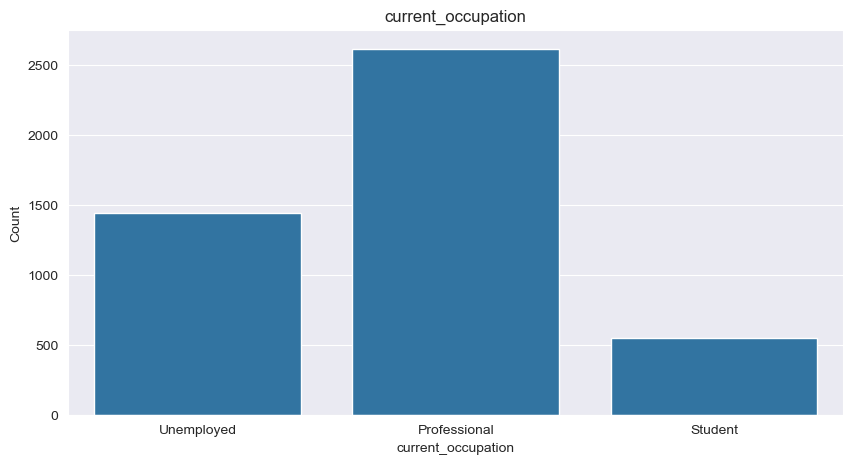

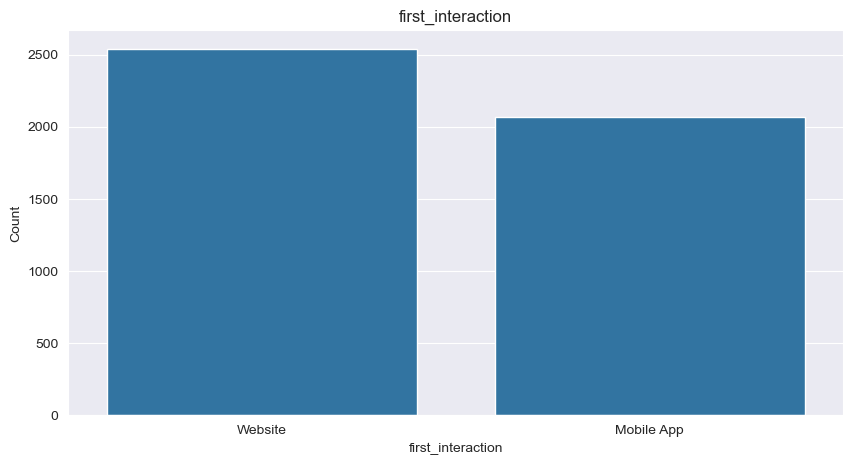

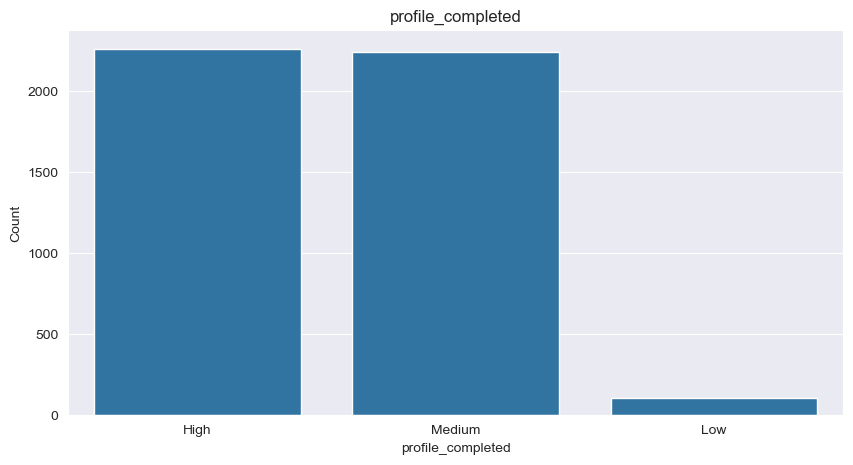

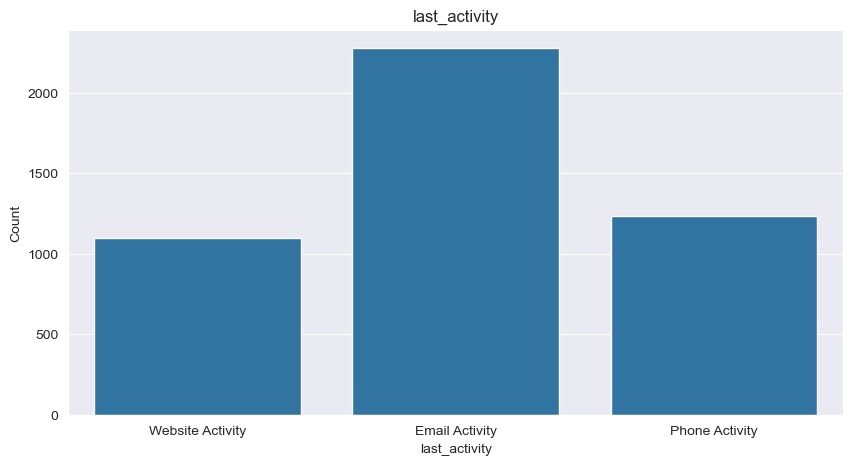

In [13]:
# call the function
analyze_categorical(df[categorical_vars])

In [14]:
# analyze numerically by looking at proportions

# function to show the normalized frequency of each value
def categorical_frequencies(cat_df: pd.DataFrame):
    
    # loop through each col and cal value_counts
    for i, col in enumerate(cat_df.columns):
        print(f"{i+1}. {col}:","\n")
        print(cat_df[col].value_counts(normalize=True), "\n")

In [15]:
# call the function
categorical_frequencies(df[categorical_vars])

1. current_occupation: 

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64 

2. first_interaction: 

first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64 

3. profile_completed: 

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64 

4. last_activity: 

last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64 


## Analyze Numerical Variables

In [16]:
# view summary statistics of numerical variables
df[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [17]:
# function to create histograms and boxplots for each variable
def analyze_numerical(numeric_cols: list, bivariate=False): 
    
    # loop through the columns of the dataframe
    for col in numeric_cols:
        
        # initialize a figure
        fig = plt.figure(figsize=(10, 3))
        
        plt.suptitle(f"{col}")
        
        # add subplots to the figure
        ax_1 = fig.add_subplot(1, 2, 1)
        ax_2 = fig.add_subplot(1, 2, 2)
        
        if bivariate:
            # create the histogram and add it to the first ax
            sns.histplot(data=df, x=col, ax=ax_1, kde=True, stat='probability', hue='status')
            
            # create the boxplot and add it to the second ax
            sns.boxplot(data=df, x=col, ax=ax_2, showmeans=True, hue='status')
        else:
            # create the histogram and add it to the first ax
            sns.histplot(data=df, x=col, ax=ax_1, kde=True, stat='probability')
            
            # create the boxplot and add it to the second ax
            sns.boxplot(data=df, x=col, ax=ax_2, showmeans=True)
        
        # display the plot
        plt.show()

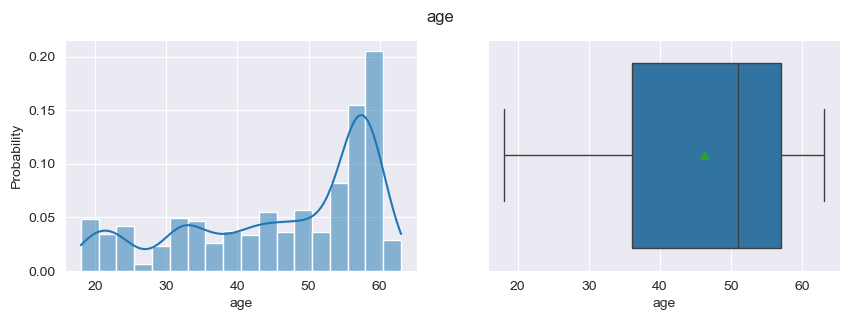

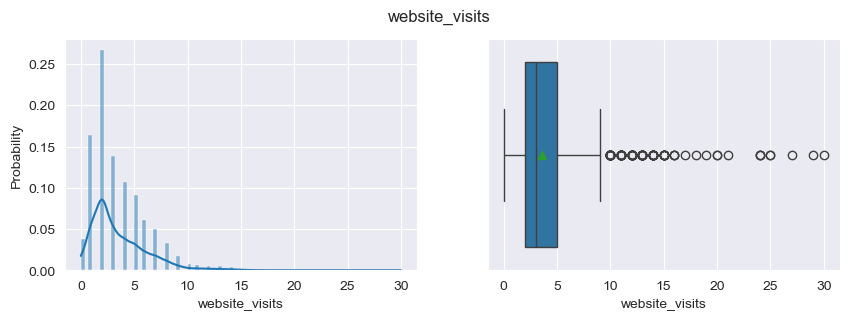

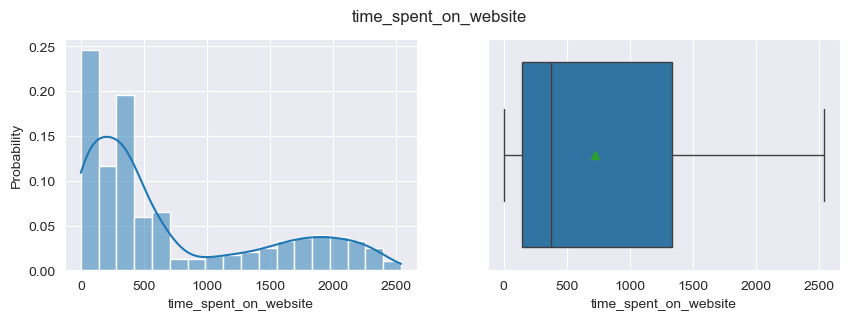

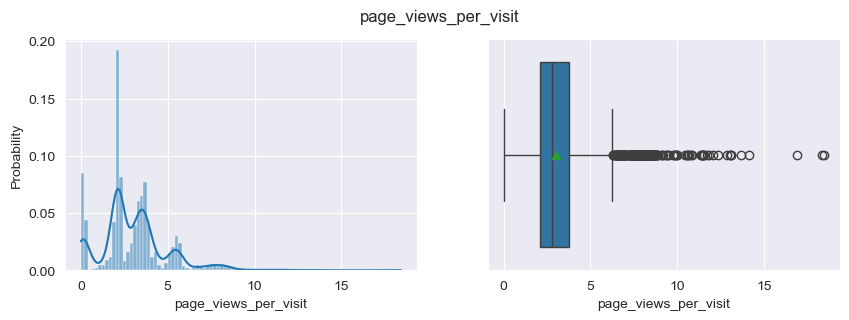

In [18]:
# call the function 
analyze_numerical(df[numerical_vars])

## Analyze Binary Variables

In [19]:
# function to create bar plots for the binary variables
def analyze_binary(binary_df: pd.DataFrame):
    
    # loop through the columns of the dataframe
    for col in binary_df.columns:
        plt.figure(figsize=(10, 3))
        
        plt.suptitle(f"{col} normalized bar plot")
        
        # use value counts to get the proportions of Yes and No
        bin_vals: pd.Series = df[col].value_counts(normalize=True)
        
        # create a dataframe using the proportions
        bin_df = pd.DataFrame({col: bin_vals.index, 'Proportion' : bin_vals.values})
        
        sns.barplot(data=bin_df, x=col, y='Proportion')

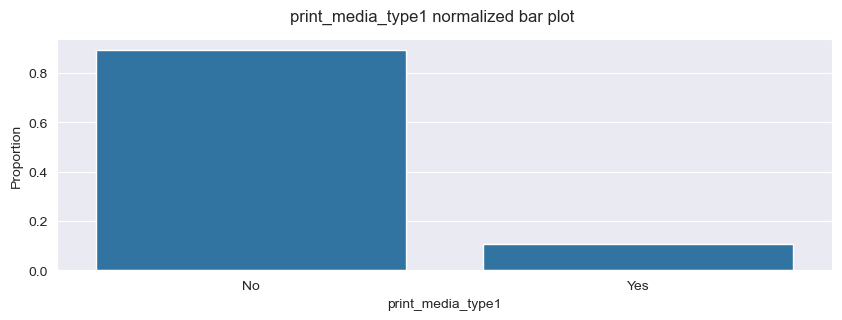

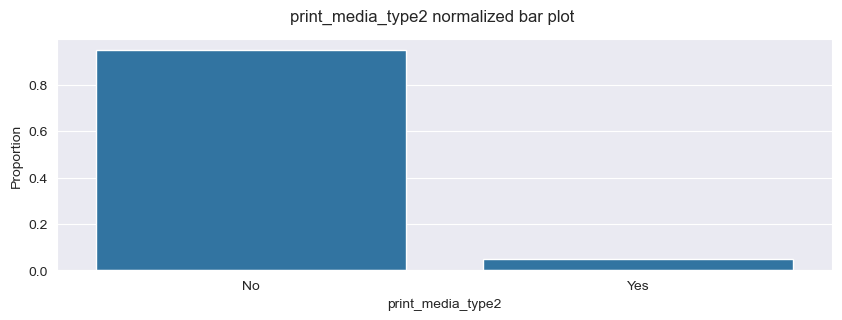

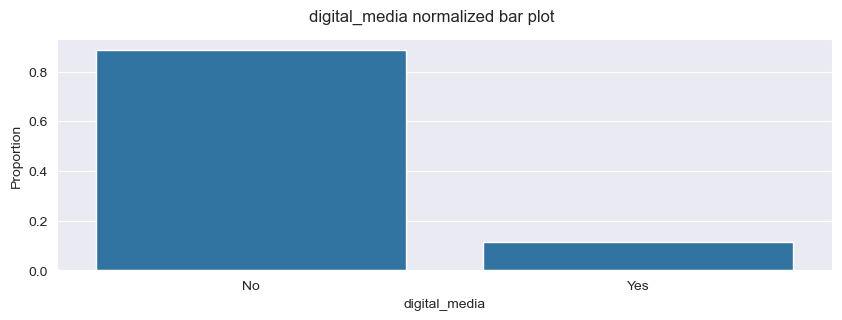

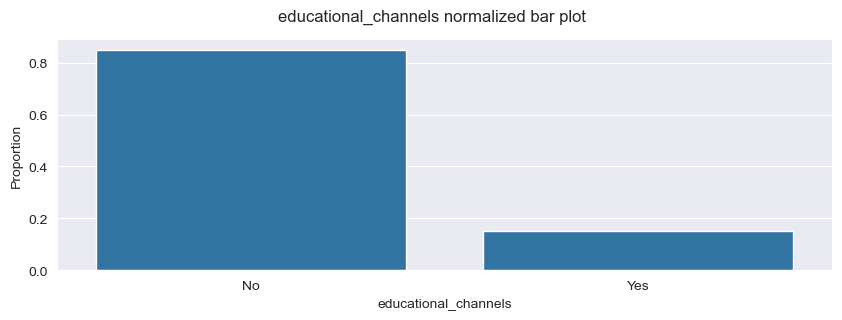

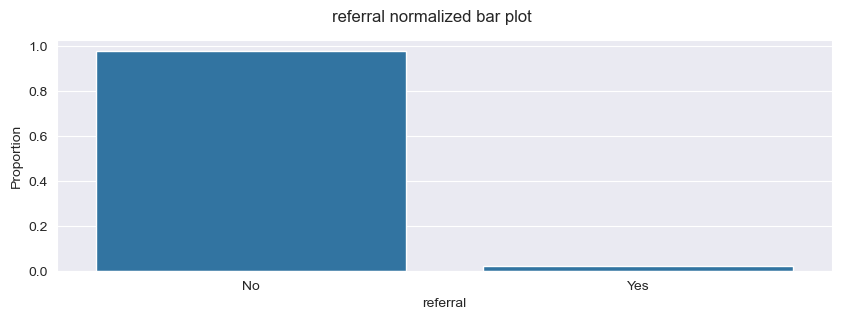

In [20]:
# view a countplot for the binary variables
analyze_binary(df[binary_vars])

In [21]:
# view the frequencies for the binary variables
categorical_frequencies(df[binary_vars])

1. print_media_type1: 

print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64 

2. print_media_type2: 

print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64 

3. digital_media: 

digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64 

4. educational_channels: 

educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64 

5. referral: 

referral
No     0.979835
Yes    0.020165
Name: proportion, dtype: float64 


## Inspect the Target Variable

In [22]:
# inspect the proportion of leads that were converted
df['status'].value_counts(normalize=True)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

# Bivariate Analysis

## Categorical variables 

In [23]:
# start with categorical data
# plot count plots of each data piece, with hue of status, 

def categorical_proportions(data_df: pd.DataFrame, cols: list):
    
    for col in cols:
        
        # split words in the title to capitalize
        title = col.split("_")
        
        # capitalize each word in the title and join into a single word 
        title = ' '.join(word.capitalize() for word in title)
        
        # compute the proportions of each value of the variable falling into 1 or 0 of the status variable
        proportions: pd.DataFrame = pd.crosstab(df[col], df["status"], normalize='index').reset_index()
        
        # melt for plotting
        proportions: pd.DataFrame = proportions.melt(id_vars=col, var_name='Status', value_name='Proportion')
        
        # initialize the figure
        plt.figure(figsize=(10, 3))
        
        # add a title
        plt.title(f"Bar plot of {title} stratified by status")
        
        # plot the barplot 
        sns.barplot(x=col, y="Proportion",hue="Status", data=proportions)
        
        # display
        plt.show()

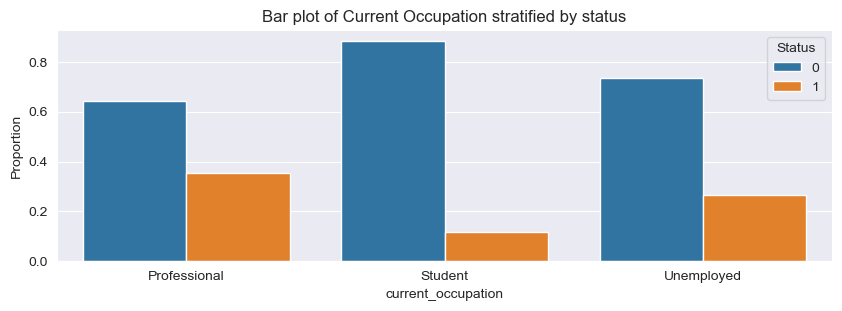

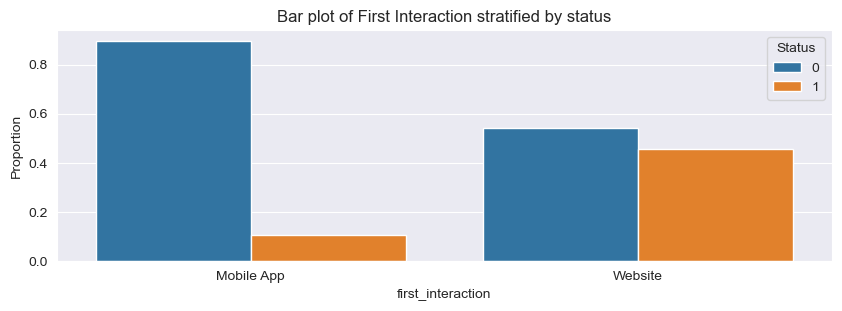

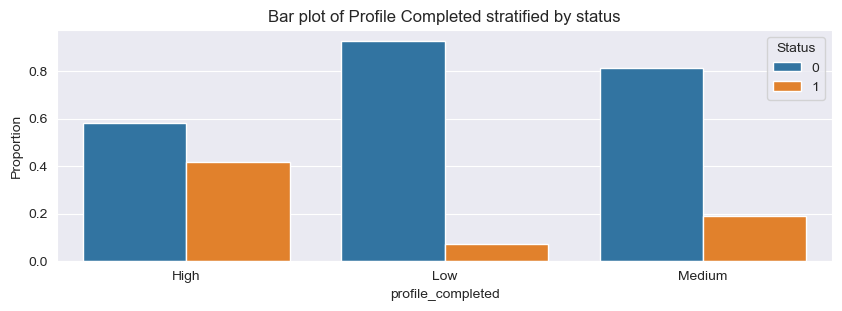

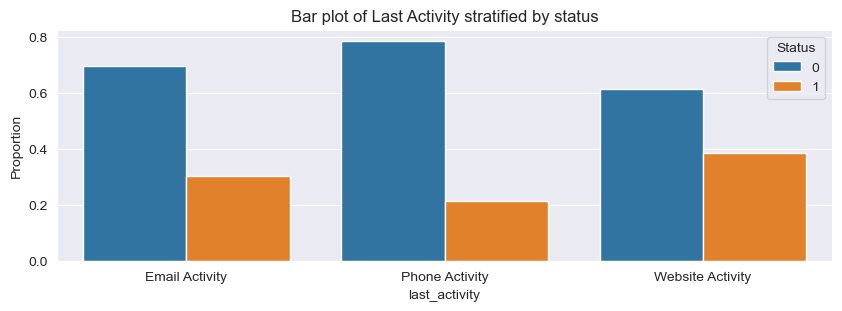

In [24]:
# plot the countplots for the categorical variables against status
categorical_proportions(df, categorical_vars)

## Numerical Variables

### check the mean of the variables over the status variable values

In [25]:
# view the summary statistic for status = 0
summary_stats_0 = df.loc[df["status"]==0,numerical_vars].describe().T
summary_stats_0

,count,mean,std,min,25%,50%,75%,max
age,3235.0,45.153014,13.748843,18.0,33.0000,49.000,57.0000,63.000
website_visits,3235.0,3.578980,2.874222,0.0,2.0000,3.000,5.0000,30.000
time_spent_on_website,3235.0,577.420711,676.340484,0.0,88.0000,317.000,646.0000,2531.000
page_views_per_visit,3235.0,3.025732,1.997962,0.0,2.0745,2.706,3.7735,18.434


In [26]:
# view the summary statistic for status = 1
summary_stats_1 = df.loc[df["status"]==1,numerical_vars].describe().T
summary_stats_1

,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656


### view summary statistics over different outcomes of the status variable

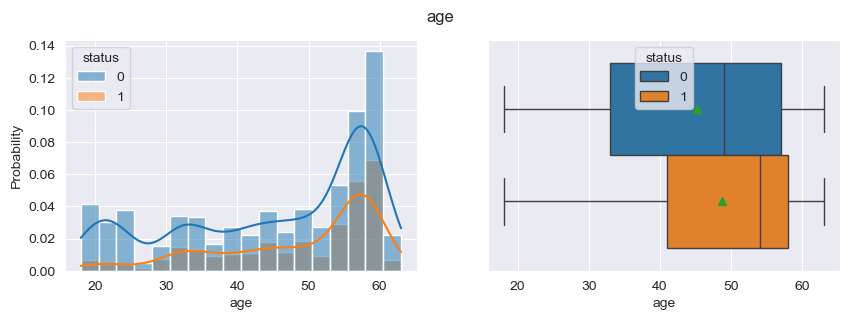

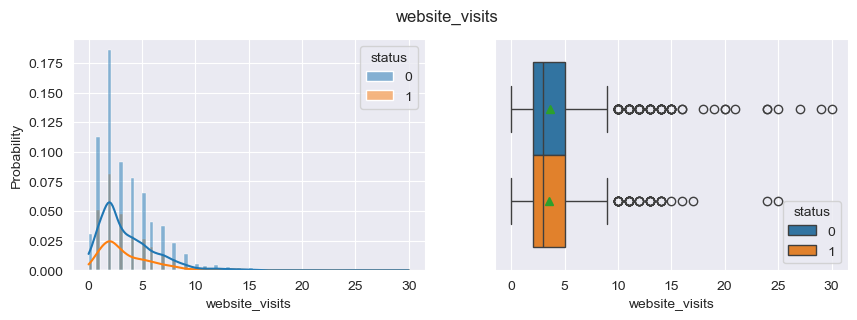

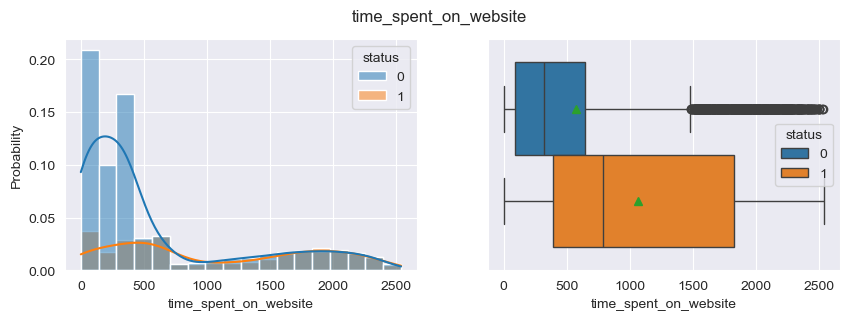

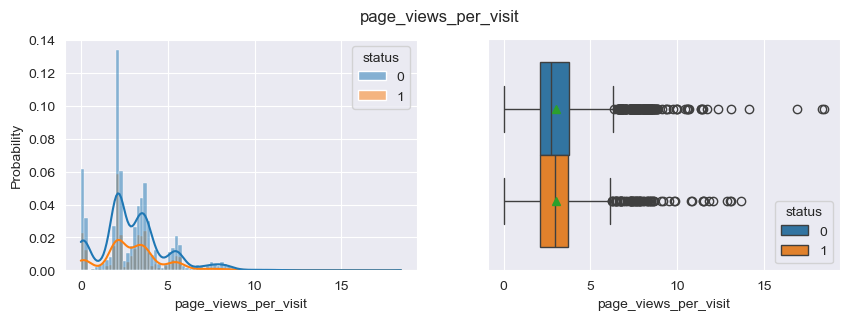

In [27]:
analyze_numerical(numerical_vars, True)

### Observations

The distribution of the age variable is left skewed with respect to both paid and unpaid customers. However, for paid customers, most of the data is clustered around the 40 - 65 age groups, with a mean age of around 48 years. 

Time spent on website...

The distribution for the page views per visit across the different values of status is almost identical. Under the both the positive and negative cases, the distribution of the data is multi-model, suggesting that the page_views_per_visit is not important in determining whether the customer becomes a paid customer or not. 

Website visits - also not too important. 



### Inspect the correlations between variables

<Axes: >

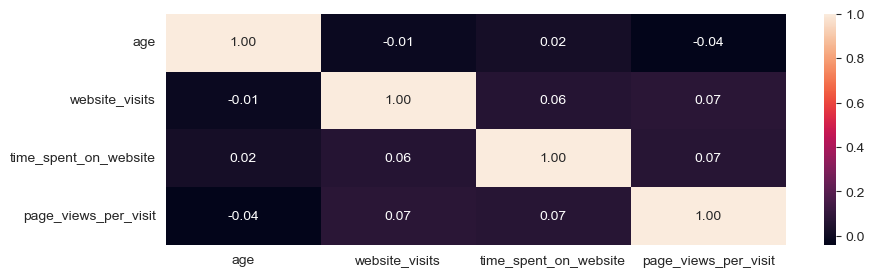

In [28]:
# use a heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(df[numerical_vars].corr(), annot=True, fmt='0.2f')

## Binary Variables

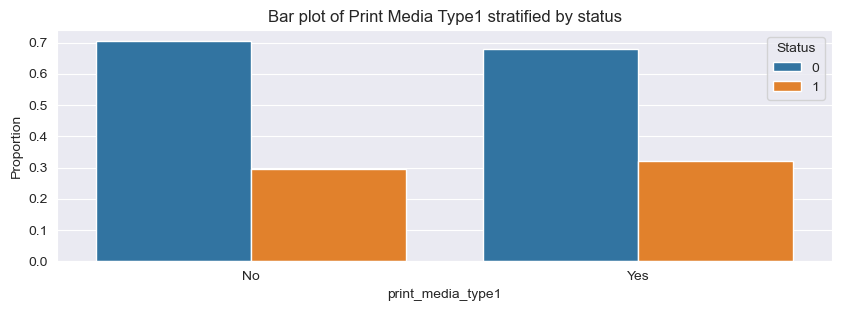

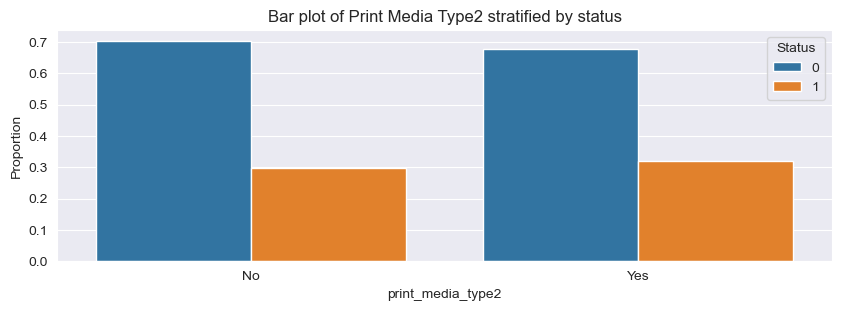

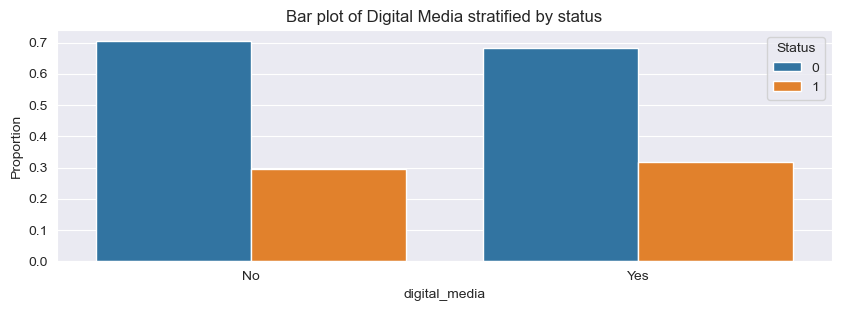

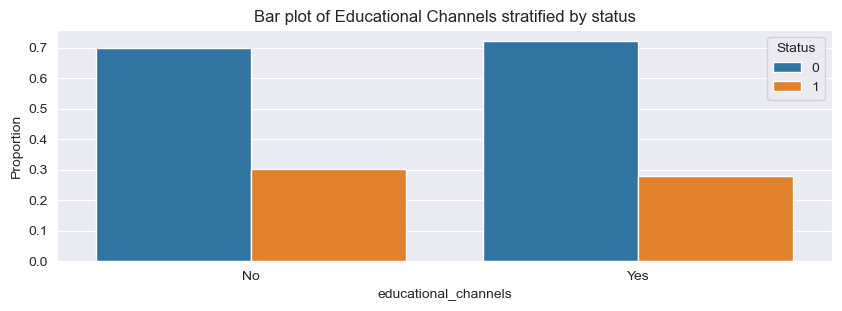

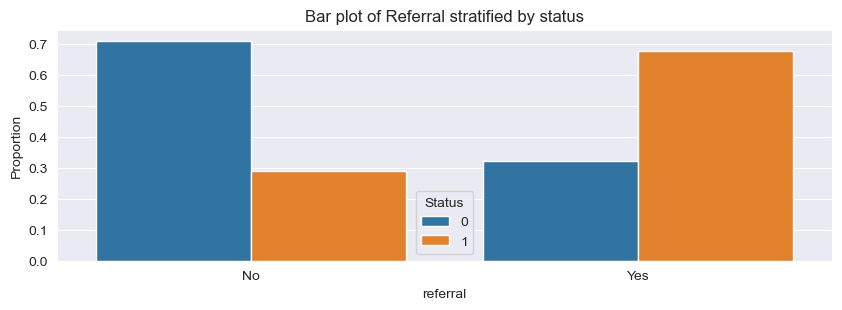

In [29]:
# see a bar plot of the proportions of value falling into each value of the status variable
categorical_proportions(df, binary_vars)

### Observations

The distributions of each out outcome of the binary variables with respect to the status variable are virtually identical (except the referral variable). Further, the distributions of the "No" and "Yes" categories of each variable with respect to the two outcomes of the status variable also have almost identical distributions (Roughly 70% 0, and 30% 1).  

The referral variable is the exception. The distribution of the "No" category of the referral variable with respect to the status variable is virtually identically to that of each of the other variables. However, the "Yes" category of the referral variable has the exact opposite distribution with respect to the status variable, (30% 0, and 70% 1). This suggests that a lead having heard about the program through a referral plays a major role in whether or not the lead is converted to a paying customer. 

It seems that only referral accounts for differences in status.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Keep only the relevant variables

In [30]:
# make a copy of the binary variables list
binary_vars_drop = copy.deepcopy(binary_vars)

# keep only the referral variable
binary_vars_drop.remove('referral')

# make a copy of the numerical vars
numerical_vars_drop = copy.deepcopy(numerical_vars)

# remove unecessary values from numerical variables list
numerical_vars_drop.remove('age')
numerical_vars_drop.remove('time_spent_on_website')

# drop the two columns form the numerical variables and all the binary variables except referral
cols_to_drop = numerical_vars_drop + binary_vars_drop

# drop unecessary columns
df = df.drop(columns=cols_to_drop, inplace=False)

# inspect the dataframe
df.head()

,age,current_occupation,first_interaction,profile_completed,time_spent_on_website,last_activity,referral,status
0,57,Unemployed,Website,High,1639,Website Activity,No,1
1,56,Professional,Mobile App,Medium,83,Website Activity,No,0
2,52,Professional,Website,Medium,330,Website Activity,No,0
3,53,Unemployed,Website,High,464,Website Activity,No,1
4,23,Student,Website,High,600,Email Activity,No,0


### Encode the values of the categorical and binary variables

In [31]:
#encode the referral binary variable
df['referral'] = df['referral'].map({"Yes": 1, "No": 0})

# inspect the resulting values in the referral column
df['referral'].unique()

array([0, 1], dtype=int64)

In [32]:
# encode the categorical variables with dummy variables
df = pd.get_dummies(df,columns=categorical_vars, dtype='int')

df.head()

,age,time_spent_on_website,referral,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
0,57,1639,0,1,0,0,1,0,1,1,0,0,0,0,1
1,56,83,0,0,1,0,0,1,0,0,0,1,0,0,1
2,52,330,0,0,1,0,0,0,1,0,0,1,0,0,1
3,53,464,0,1,0,0,1,0,1,1,0,0,0,0,1
4,23,600,0,0,0,1,0,0,1,1,0,0,1,0,0


### Split the data into features and classes

In [33]:
# get dataframe of features
X: pd.DataFrame = df.drop(labels='status',axis=1, inplace=False)

# series for response variable
Y: pd.Series = df['status']

### Split the data into test and training sets

In [34]:
#use the train_test_split function to split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

### Scale the data

In [35]:
# initialize a standard scaler instance
sc = StandardScaler()

sc = sc.fit(X_train)

x_train_scaled: np.ndarray = sc.transform(X_train)

x_test_scaled: np.ndarray = sc.transform(X_test)

X_train_df: pd.DataFrame = pd.DataFrame(data=x_train_scaled, columns=X.columns)

X_test_df: pd.DataFrame = pd.DataFrame(data=x_test_scaled, columns=X.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [36]:
# function for model evaluation
# function fro model evaluation
# define a function to evalute the models performance
def evaluate_model(y_true: pd.Series or np.ndarray, y_pred: pd.Series or np.ndarray):
    
    # print a classification report 
    print(classification_report(y_true, y_pred))
    
    cm: np.ndarray = confusion_matrix(y_true, y_pred)
    print(cm)

## Building a Decision Tree model

In [37]:
# initialize a decision tree model instance 
# the class weights are according to the proportion of 0's and 1's in the status variable observed in the dataset
decision_classifier = DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=42)

In [38]:
# fit the data to the tree classifier
decision_classifier.fit(X_train_df, Y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=42)

### Analysis of model on the training set

In [39]:
# make predictions based on the training set
Y_train_pred_tree: np.ndarray = decision_classifier.predict(X_train_df)

evaluate_model(Y_train, Y_train_pred_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2425
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      3459
   macro avg       1.00      1.00      1.00      3459
weighted avg       1.00      1.00      1.00      3459

[[2425    0]
 [   4 1030]]


### Evaluate model on the test set

In [40]:
# use the learned model to make predictions on the test set
Y_test_pred_tree = decision_classifier.predict(X_test_df)

evaluate_model(Y_test, Y_test_pred_tree)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       810
           1       0.64      0.66      0.65       343

    accuracy                           0.79      1153
   macro avg       0.75      0.75      0.75      1153
weighted avg       0.79      0.79      0.79      1153

[[683 127]
 [116 227]]


## Do we need to prune the tree?

We see that the model performs perfectly on the training set, but that performance has significantly decreased on the test data set. The indicates that the tree is overfitting the data (has grown too large), and could benefit from pruning.

### Use Cost complexity to prune the tree

In [41]:
# get the path
path: Bunch = decision_classifier.cost_complexity_pruning_path(X_train_df,Y_train)

<class 'sklearn.utils._bunch.Bunch'>


In [45]:
# get the alphas
alphas: np.ndarray = path.ccp_alphas

# get the impurities
impurities: np.ndarray = path.impurities

# train the decision tree using effective alphas

# list to hold each of the pruned trees for different values of alpha
pruned_trees = []

for alpha in alphas:
    # initialize a tree model with the current alpha
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    
    # fit the data to the model 
    tree.fit(X_train_df, Y_train)
    
    #append the model to the list
    pruned_trees.append(tree)

In [47]:
# accuracy vs alpha for training and test sets

# get the train scores?
train_scores: list = [tree.score(X_train_df,Y_train) for tree in pruned_trees]

# get the test scores
test_scores: list = [tree.score(X_test_df, Y_test) for tree in pruned_trees]

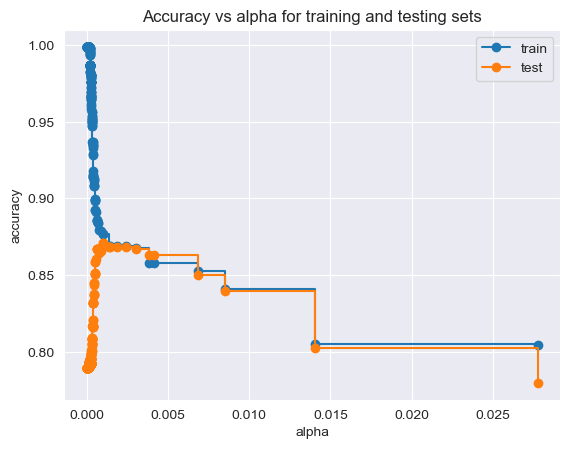

In [65]:
# plot the results
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [68]:
# get the value of alpha that maximizes the accuracy
alpha_star_idx: int = test_scores.index(max(test_scores))

alpha_star: float = alphas[alpha_star_idx]
alpha_star

0.001002702833575361

### Fit a decision Tree using the best alpha

In [69]:
# intialize the tree classifier with the alpha that maximizes accuracy on the test set
tree_star = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha_star)

# fit the data to the tree
tree_star.fit(X_train_df, Y_train)

DecisionTreeClassifier(ccp_alpha=0.001002702833575361, random_state=1)

### Evaluate Performance using the training dataset

In [73]:
# make predictions using the training set
y_pred_train_tree_star = tree_star.predict(X_train_df)

# evaluate the model
evaluate_model(Y_train, y_pred_train_tree_star)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2425
           1       0.82      0.75      0.78      1034

    accuracy                           0.88      3459
   macro avg       0.86      0.84      0.85      3459
weighted avg       0.87      0.88      0.87      3459

[[2254  171]
 [ 256  778]]


### Evaluate Performance using the Test data set

In [75]:
# make predictions using the test set
y_pred_test_tree_star = tree_star.predict(X_test_df)

# evaluate the model
evaluate_model(Y_test, y_pred_test_tree_star)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       810
           1       0.81      0.74      0.77       343

    accuracy                           0.87      1153
   macro avg       0.85      0.83      0.84      1153
weighted avg       0.87      0.87      0.87      1153

[[751  59]
 [ 90 253]]


## Observations

We see that the decision classifier has benefited from the pruning and use of the optimal alpha. It is no longer overfitting on the training set, and accuracy on the test set has improved.

## Testing the model when adjusting the class weight

In [79]:
# intialize the tree classifier with the alpha that maximizes accuracy on the test set
tree_star_weighted = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha_star, class_weight={0: 0.7, 1: 0.3})

# fit the data to the tree
tree_star_weighted.fit(X_train_df, Y_train)

DecisionTreeClassifier(ccp_alpha=0.001002702833575361,
                       class_weight={0: 0.7, 1: 0.3}, random_state=1)

In [80]:
pred = tree_star_weighted.predict(X_test_df)

evaluate_model(Y_test, pred)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       810
           1       0.84      0.69      0.76       343

    accuracy                           0.87      1153
   macro avg       0.86      0.82      0.83      1153
weighted avg       0.87      0.87      0.86      1153

[[764  46]
 [107 236]]


### Parameter Tuning

In [82]:
# Choose the type of classifier
tree_tuned = DecisionTreeClassifier(ccp_alpha=alpha_star, random_state = 1)

# Grid of parameters to choose from
parameters = { 
              'criterion': ['gini', 'entropy'],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(tree_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train_df, Y_train)

# Set the classifier to the best combination of parameters
tree_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
tree_tuned.fit(X_train_df, Y_train)

DecisionTreeClassifier(ccp_alpha=0.001002702833575361, random_state=1)

In [83]:
# evaluate the model 
pred_tree_tuned = tree_tuned.predict(X_test_df)

evaluate_model(Y_test, pred_tree_tuned)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       810
           1       0.81      0.74      0.77       343

    accuracy                           0.87      1153
   macro avg       0.85      0.83      0.84      1153
weighted avg       0.87      0.87      0.87      1153

[[751  59]
 [ 90 253]]


### Analyze the Model

#### Visualize feature importances

In [84]:
# get the list of importances for each feature
feature_importances: np.ndarray = tree_star.feature_importances_

#initialize a dataframe using the importance array
importance_df: pd.DataFrame = pd.DataFrame(feature_importances,columns=["Importance"], index = X.columns).sort_values(by = "Importance", ascending=False)

# inspect the resulting dataframe
importance_df.head()

,Importance
time_spent_on_website,0.274722
first_interaction_Mobile App,0.214816
first_interaction_Website,0.135280
profile_completed_High,0.129299
current_occupation_Professional,0.096596


<Axes: xlabel='Importance', ylabel='None'>

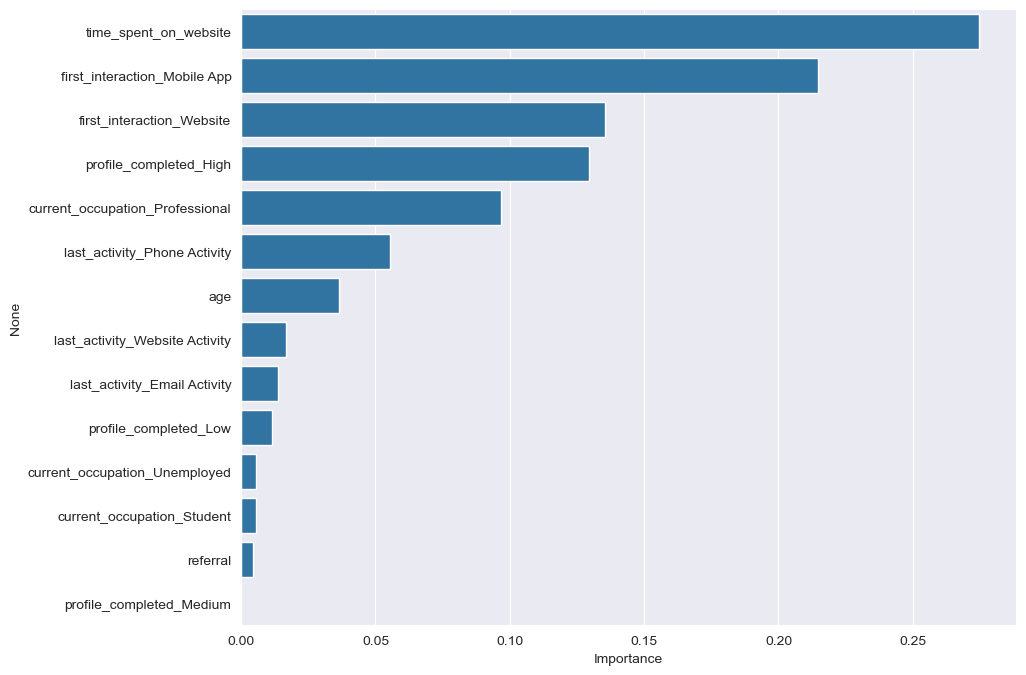

In [87]:
# create an empty figure
plt.figure(figsize = (10, 8))

# plot a bar chart
sns.barplot(importance_df, x = "Importance", y = importance_df.index)

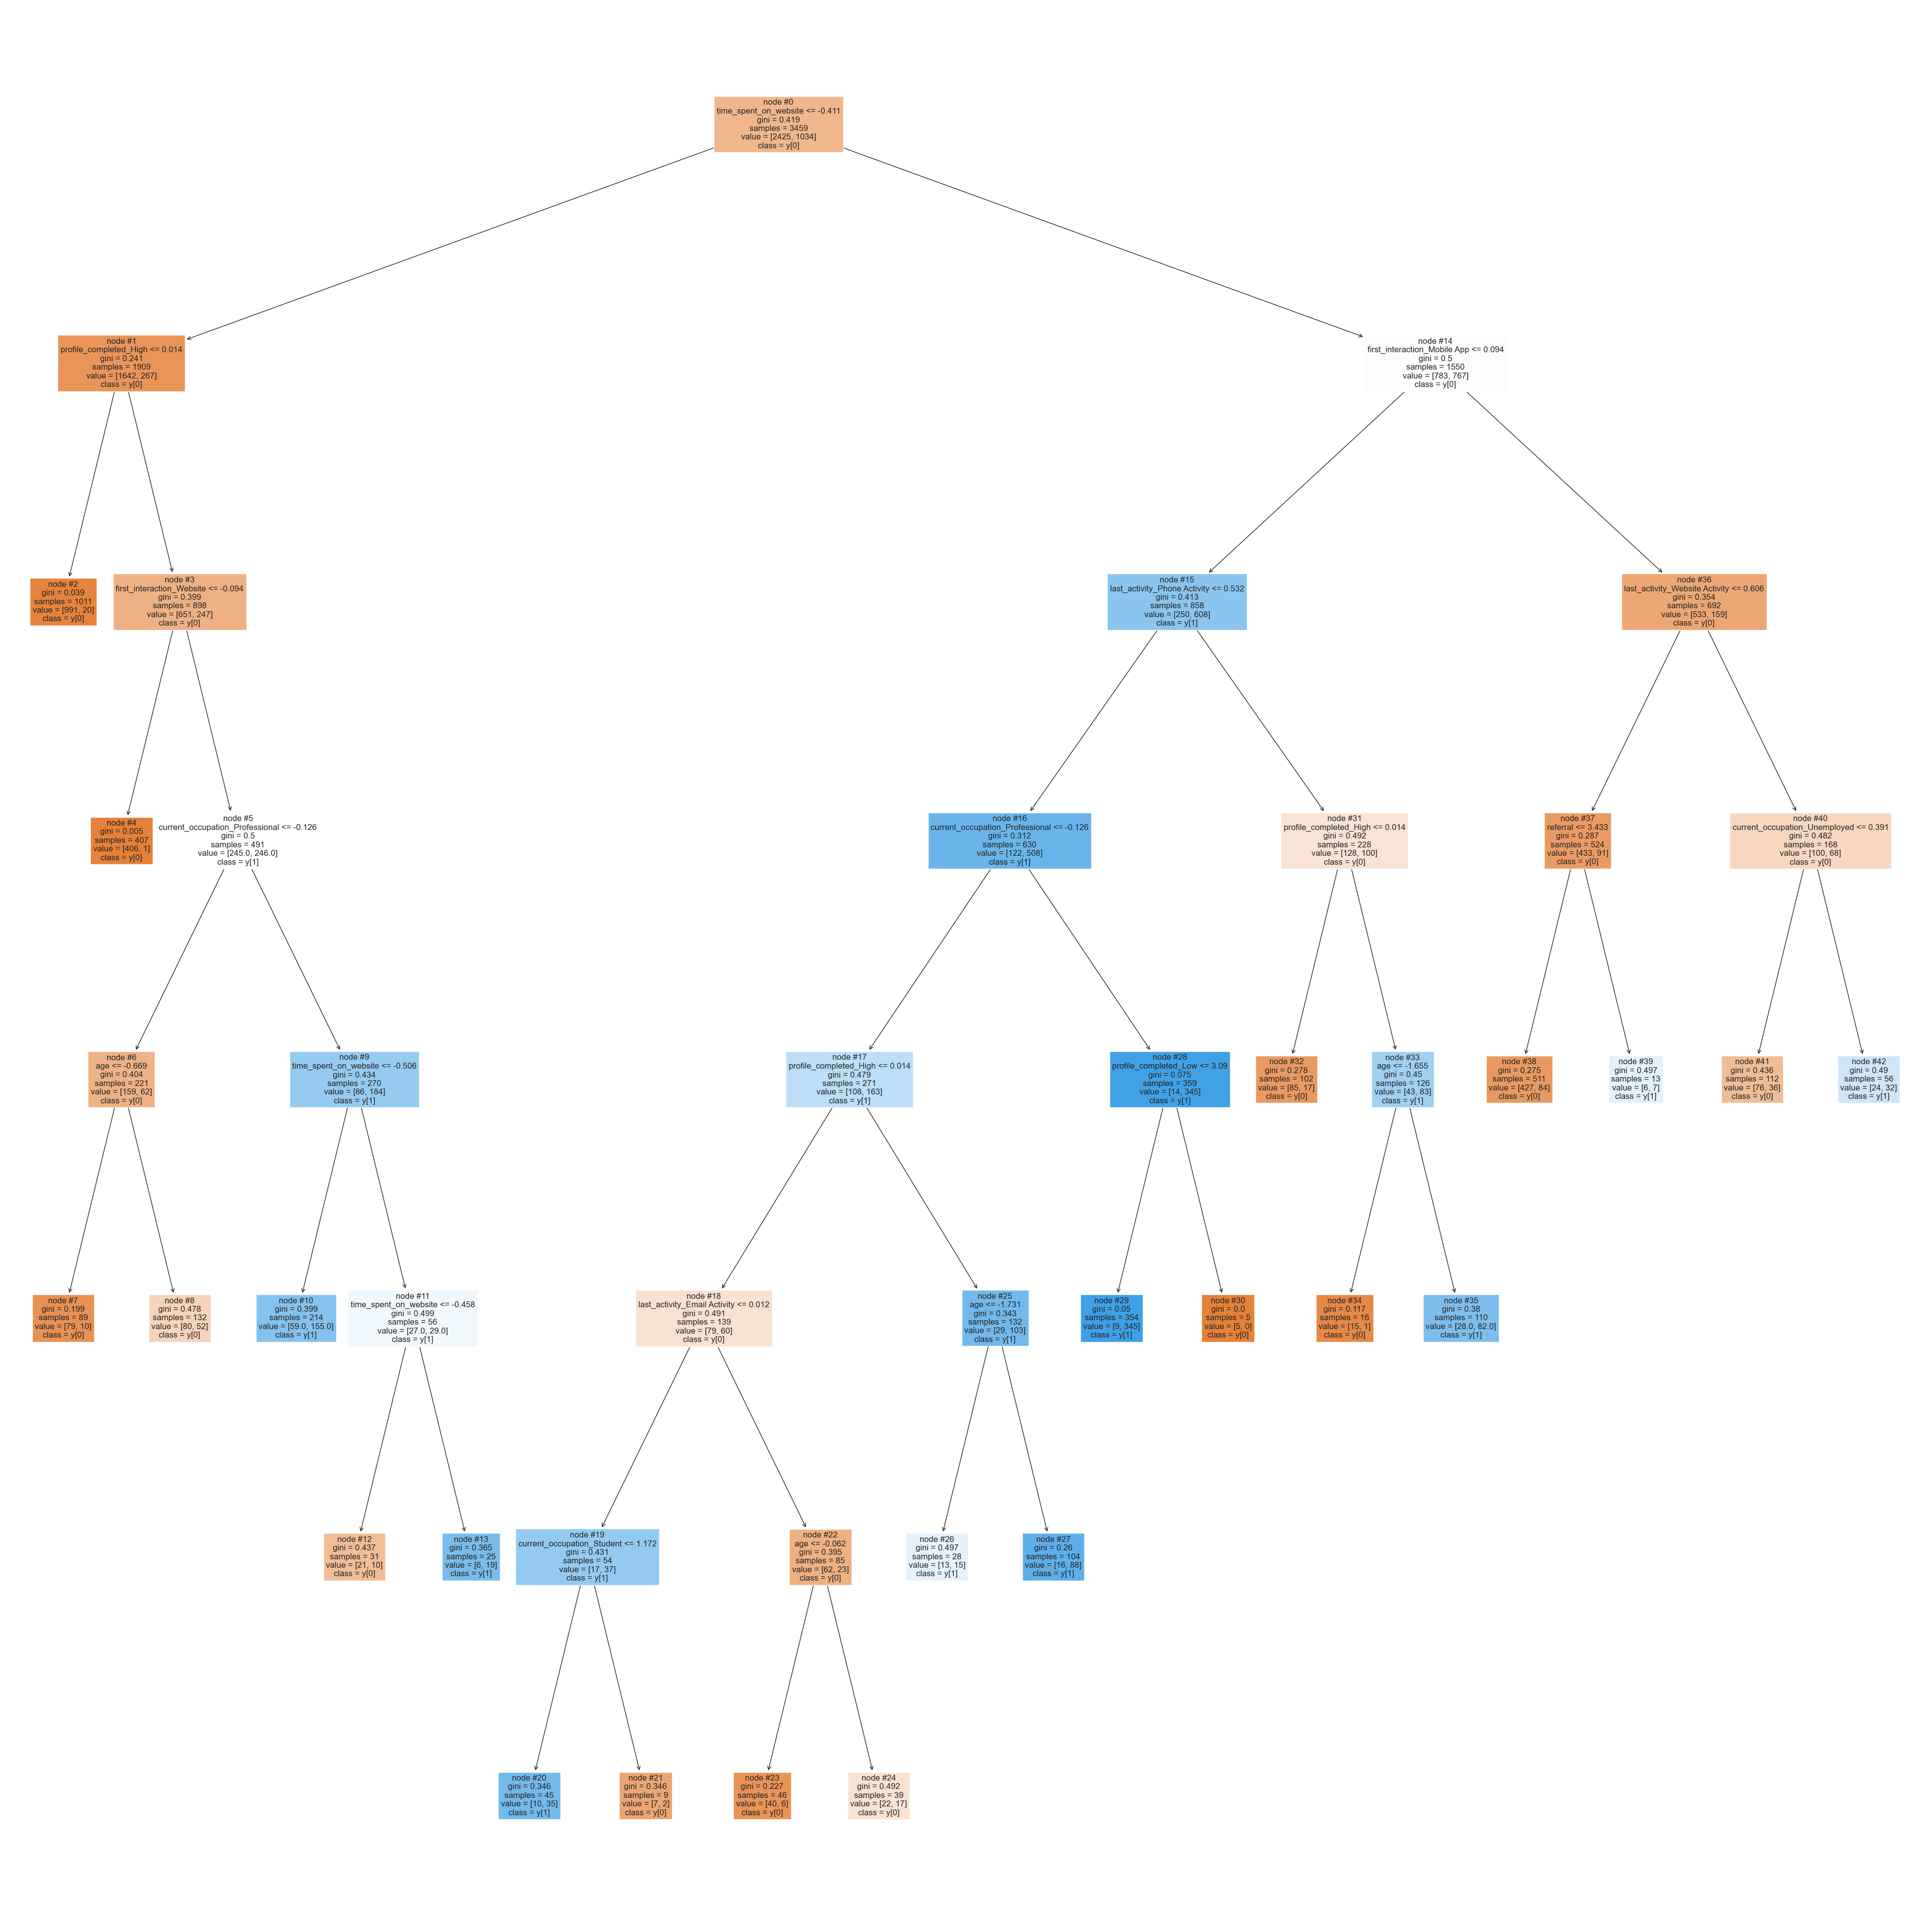

In [92]:
# get the list of features to plot
features = list(X.columns)

# initialize an empty figure 
plt.figure(figsize = (50, 50))

#create a plot of the tree
tree.plot_tree(tree_star, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### Observations

Most imprtant factors: Time spent on Website, first interaction on mobile or website, have completed most of their profile and are professionals (occupation).

# Building a random Fores Model

## Do we need to prune the tree?

## Actionable Insights and Recommendations